### About Dataset
Context:

- The aviation accident database throughout the world, from 1908-2019.

- All civil and commercial aviation accidents of scheduled and non-scheduled passenger airliners worldwide, which resulted in a fatality (including all  U.S. Part 121 and Part 135 fatal accidents)

- All cargo, positioning, ferry and test flight fatal accidents.

- All military transport accidents with 10 or more fatalities.

- All commercial and military helicopter accidents with greater than 10 fatalities.

- All civil and military airship accidents involving fatalities.

- Aviation accidents involving the death of famous people.

- Aviation accidents or incidents of noteworthy interest.

Content
Data is scraped from planecrashinfo.com. Below you can find the dataset column descriptions:


CSV FILE: https://www.kaggle.com/datasets/cgurkan/airplane-crash-data-since-1908/download

Website: http://www.planecrashinfo.com/database.htm

In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


In [170]:
ar = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv")

In [171]:
#ar.head(5)

# 1 - Check what kind of data it goes through.

In [172]:
ar['Date'] = pd.to_datetime(ar['Date']) # CHANGE DATA TYPE

In [173]:
ar.describe()

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4949.000000,4738.000000,4741.000000,4959.000000,4725.000000,4726.000000,4926.000000
mean,31.088301,26.898691,4.479646,22.338173,19.017566,3.579348,1.728177
std,45.438282,44.010591,3.489021,35.026176,34.114849,3.170223,55.708966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000


# 2 - Remove NaN from the Operators

In [174]:
remNOp = ar[ar['Operator'].notna()] 
#remNOp.head(5)

# 3 - Most crashed operators sorted by operator 1908= > 2019.

In [175]:
crashes = remNOp.groupby('Operator', as_index=True).size().sort_values(ascending=False)
crashes

Operator
Aeroflot                     255
Military - U.S. Air Force    140
Air France                    72
Deutsche Lufthansa            63
United Air Lines              44
                            ... 
Flyve Tjenesten                1
Flying W Airways               1
Flydubai                       1
Fly Montserrat                 1
èkoda (India) Ltd              1
Length: 2242, dtype: int64

Text(0.5, 0, 'Operator')

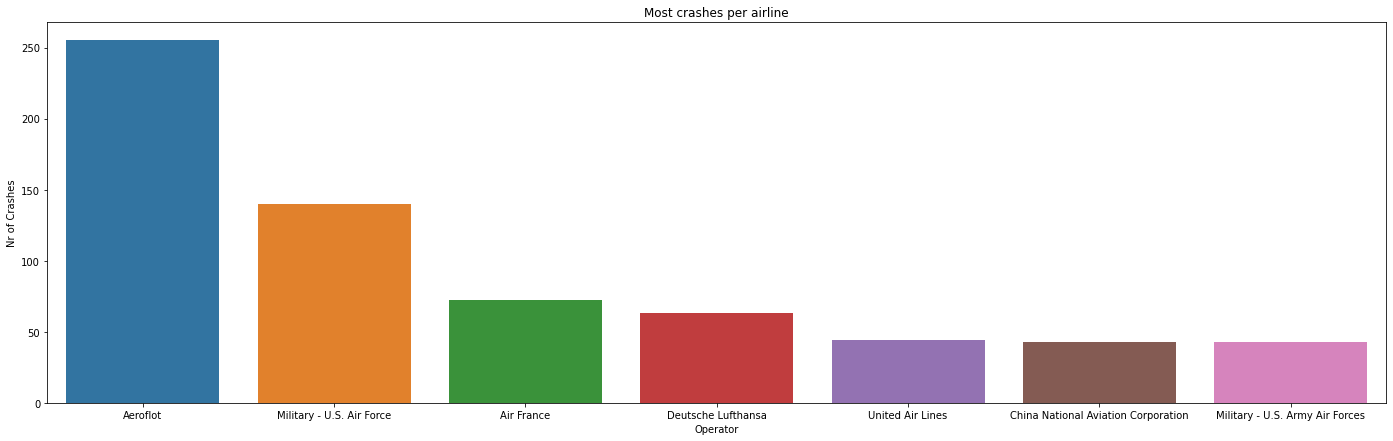

In [176]:
plt.figure(figsize=(24, 7))
sns.barplot(x=crashes.head(7).index, y=crashes.head(7))
plt.title('Most crashes per airline')
plt.ylabel('Nr of Crashes')
plt.xlabel('Operator')

# 4 - Most crashed aircraft types in 1908= > 2019.

In [177]:
remNOp2 = ar[ar['AC Type'].notna()] # Remove NaN from the AC Type
aircraft = remNOp2.groupby('AC Type', as_index=True).size().sort_values(ascending=False)
aircraft

AC Type
Douglas DC-3                                333
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 64
Douglas DC-4                                 38
                                           ... 
Convair CV-340-62                             1
Convair CV-340-59                             1
Convair CV-340-32                             1
Convair CV-300                                1
deHavilland DH-86                             1
Length: 2447, dtype: int64

http://www.dc3history.org/russianli2.html

Text(0.5, 0, 'Aircraft')

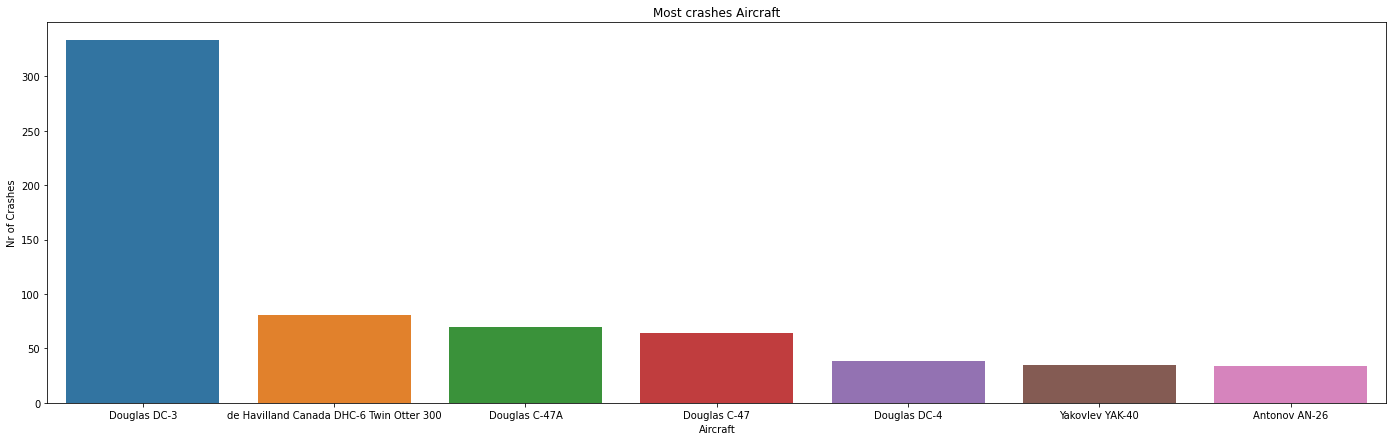

In [178]:
plt.figure(figsize=(24, 7))
sns.barplot(x=aircraft.head(7).index, y=aircraft.head(7))
plt.title('Most crashes Aircraft')
plt.ylabel('Nr of Crashes')
plt.xlabel('Aircraft')

# 5 - Most crashed operators sorted by operator between 2000 and 2019.

In [179]:
crash_2000 =  remNOp[pd.DatetimeIndex(remNOp['Date']).year >= 2000]
opByCrash = crash_2000.groupby('Operator').size().sort_values(ascending=False)
opByCrash

Operator
Military - U.S. Army               6
Military - Indonesian Air Force    5
American Airlines                  4
Trigana Air Service                4
Military - Russian Air Force       4
                                  ..
Heliwork WA Pty Ltd. - Air Taxi    1
Henan Airlines                     1
Heringer Air Taxi                  1
Heringer Taxi Aero                 1
\tAmazonavesAir Taxi               1
Length: 647, dtype: int64

Text(0.5, 0, 'Operator')

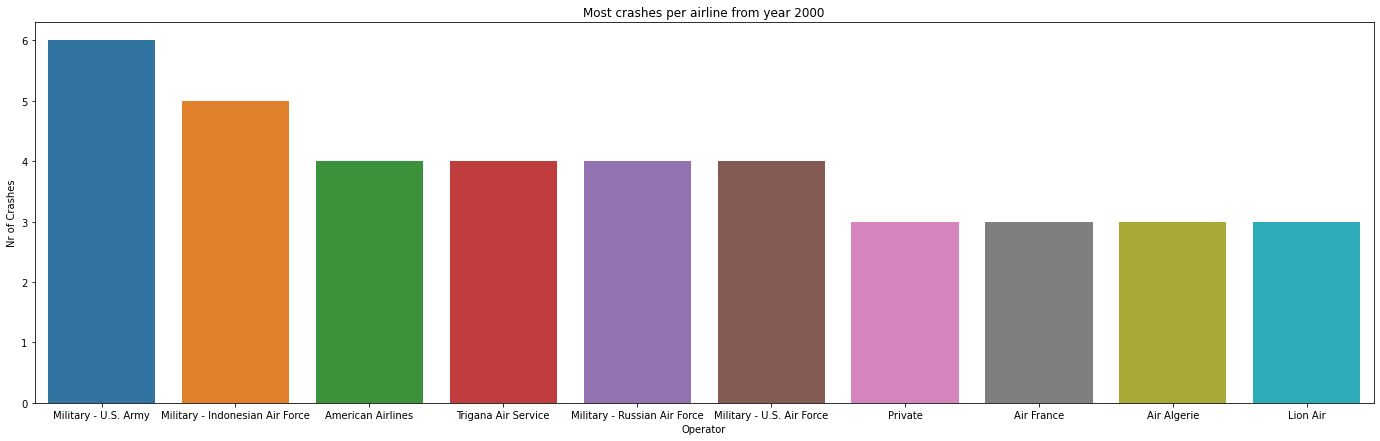

In [180]:
plt.figure(figsize=(24, 7))
sns.barplot(x=opByCrash.head(10).index, y=opByCrash.head(10))
plt.title('Most crashes per airline from year 2000')
plt.ylabel('Nr of Crashes')
plt.xlabel('Operator')

# 6 - Area crashed aircraft 1908= > 2019.

In [181]:
locations = ar['Location'].value_counts() 
locations

Moscow, Russia         17
Manila, Philippines    14
New York, New York     14
Cairo, Egypt           13
Sao Paulo, Brazil      13
                       ..
Mount Oyama, Japan      1
Triel, France           1
Near Lazo, Russia       1
Payette, Idaho          1
Rawalpindi, India       1
Name: Location, Length: 4101, dtype: int64

Text(0.5, 0, 'Aircraft')

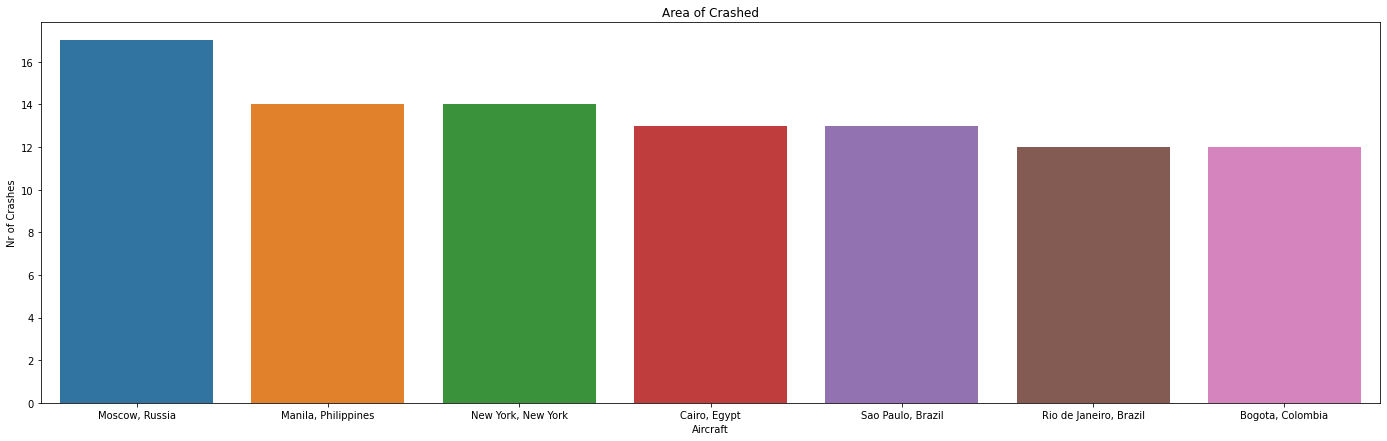

In [182]:
plt.figure(figsize=(24, 7))
sns.barplot(x=locations.head(7).index, y=locations.head(7))
plt.title('Area of Crashed')
plt.ylabel('Nr of Crashes')
plt.xlabel('Aircraft')

# 7 - Crash location by place after 2000.

In [183]:
crash_2000 = remNOp[pd.DatetimeIndex(remNOp['Date']).year >= 2000]
opByCrash = crash_2000.groupby('Location').size().sort_values(ascending=False)
opByCrash

Location
Moscow, Russia                 6
Tehran, Iran                   5
New York, New York             3
Bishkek, Kyrgyzstan            2
Near Baghdad, Iraq             2
                              ..
Mahad, Iran                    1
Malatya, Turkey                1
Malemba Nkulu, DR Congo        1
Malta International Airport    1
Zheng Zou AB, China            1
Length: 694, dtype: int64

In [184]:
# plt.figure(figsize=(24, 7))
# sns.barplot(x=opByCrash.head(7).index, y=opByCrash.head(7))
# plt.title('Most crashes Aircraft after 2000')
# plt.ylabel('Nr of Crashes')
# plt.xlabel('Places where are Crashed')

# 8 - Crashes by year.

In [185]:
ar["year"] = ar["Date"].dt.year
famel = ar.groupby("year", as_index=True)["Operator"].size().sort_values(ascending=False)
famel = pd.DataFrame(famel)
famel.head(15)

,Operator
year,
1946,88
1989,83
1947,82
1948,77
1962,77
1972,77
1951,75
1994,74
1945,74


<AxesSubplot:xlabel='year', ylabel='Operator'>

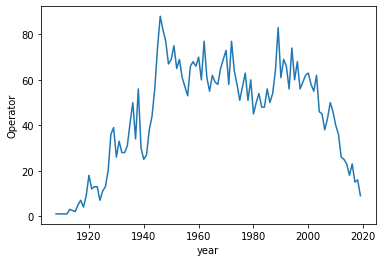

In [186]:
sns.lineplot(data=famel, x="year", y="Operator")

The drop from 2000 to now is probably couse to the new flights practices and aircraft technologies

# 9 - Find the most common couses plane crashes by finding the most common words.


In [187]:
summ = ar[ar['Summary'].notna()] 
summ['Summary'].astype('string') #Convert "summary" obj in string

0       During a demonstration flight, a U.S. Army fly...
1       Eugene Lefebvre was the first pilot to ever be...
2       First U.S. dirigible Akron exploded just offsh...
3       The first fatal airplane accident in Canada oc...
4       The airship flew into a thunderstorm and encou...
                              ...                        
4962    While the aircraft was in the initial climb, p...
4963    The aircraft crashed while en route on a retur...
4964    Forty-five minutes after taking off from Mosco...
4965                   Crashed about 34km WNW of Mechuka.
4966    The Pakistani military plane, on a training fl...
Name: Summary, Length: 4903, dtype: string

In [188]:
words = Counter(summ["Summary"]).most_common(100)
famell = pd.DataFrame(words)
famell.head(10)

,0,1
0,Crashed under unknown circumstances.,9
1,Crashed while en route.,8
2,Crashed during takeoff.,7
3,Crashed while attempting to land.,6
4,Crashed into the sea.,5
5,Crashed shortly after taking off.,5
6,Crashed under unknown circumstances,4
7,Crashed on takeoff.,4
8,Crashed en route.,4
9,Flew into a mountain.,4


# Most fatality for crash


In [189]:
prop = ar[ar['Fatalities'].notna()] #CLEAN DATA
ar = ar.dropna()
ar['Fatalities'] = ar['Fatalities'].astype(int)
ressult = pd.DataFrame(prop)
ar.sort_values(by='Fatalities', ascending=False).head(5)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,year
2885,1977-03-27,17:07,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644.0,614.0,30.0,583,560.0,23.0,0.0,Both aircraft were diverted to Tenerife becaus...,1977
3324,1985-08-12,18:56,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,123,Tokyo - Osaka,Boeing B-747-SR46,JA8119,20783/230,524.0,509.0,15.0,520,505.0,15.0,0.0,The aircraft suffered an aft pressure bulkhead...,1985
4039,1996-11-12,18:40,"Near Charkhi Dadri, India",Saudi Arabian Airlines / Kazakhstan Airlines,763/1907,New Delhi - Dhahran / Chimkent - New Delhi,Boeing B-747-168B / Ilyushin IL-76TD,HZ-AIH/UN-76435,22748/555/1023413428,349.0,316.0,33.0,349,316.0,33.0,0.0,Midair collision 17 km W of New Delhi. The Sa...,1996
2720,1974-03-03,11:41,"Near Ermenonville, France",Turkish Airlines (THY),981,Paris - London,McDonnell Douglas DC-10-10,TC-JAV,46704/29,346.0,335.0,11.0,346,335.0,11.0,0.0,The aircraft crashed shortly after takeoff fro...,1974
3320,1985-06-23,07:15,"Atlantic Ocean, 110 miles West of Ireland",Air India,182,Montreal - London,Boeing B-747-237B,VT-EFO,21473/330,329.0,307.0,22.0,329,307.0,22.0,0.0,The aircraft broke up in flight and crashed in...,1985


In [190]:
#ar.sort_values(by='Fatalities', ascending=False).head(5)


# 10 - Total fatalities by operator.

In [191]:
masc = ar.groupby(["Operator"])["Fatalities"].sum().sort_values(ascending=False)
masc = pd.DataFrame(masc)
masc.head(20)

,Fatalities
Operator,
Aeroflot,6238
American Airlines,1408
Pan American World Airways,1239
Air France,1128
United Air Lines,991
Trans World Airlines,778
China Airlines (Taiwan),771
Air India,707
Eastern Air Lines,692
